In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
# Step 1: Read the dataset from the Excel file
data = pd.read_excel('Contraceptive_method_dataset.xlsx')


In [67]:
data.head().T

,0,1,2,3,4
Wife_age,24.0,45.0,43.0,42.0,36.0
Wife_education,0.0,3.0,0.0,1.0,1.0
Husband_education,1.0,1.0,1.0,0.0,1.0
No_of_children_born,3.0,10.0,7.0,9.0,8.0
Wife_religion,1.0,1.0,1.0,1.0,1.0
Wife_Working,0.0,0.0,0.0,0.0,0.0
Husband_Occupation,2.0,3.0,3.0,3.0,3.0
Standard_of_living_index,0.0,2.0,2.0,0.0,1.0
Media_exposure,0.0,0.0,0.0,0.0,0.0
Contraceptive_method_used,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 80
(1473, 10)


In [6]:
data.drop_duplicates(inplace=True) 

In [7]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(1393, 10)


In [8]:
#Geting unique counts of all Objects
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')

Wife_ education
Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64


Husband_education
Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64


Wife_religion
Wife_religion
Scientology        1186
Non-Scientology     207
Name: count, dtype: int64


Wife_Working
Wife_Working
No     1043
Yes     350
Name: count, dtype: int64


Standard_of_living_index
Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: count, dtype: int64


Media_exposure 
Media_exposure 
Exposed        1284
Not-Exposed     109
Name: count, dtype: int64


Contraceptive_method_used
Contraceptive_method_used
Yes    779
No     614
Name: count, dtype: int64




In [9]:
data.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1326.000000,1372.000000,1393.000000
mean,32.557315,3.290816,2.174444
std,8.289259,2.399697,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


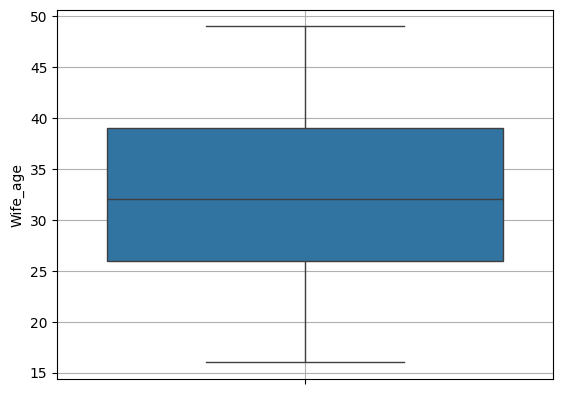

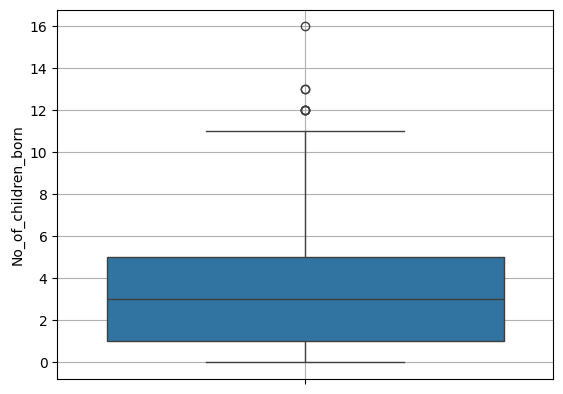

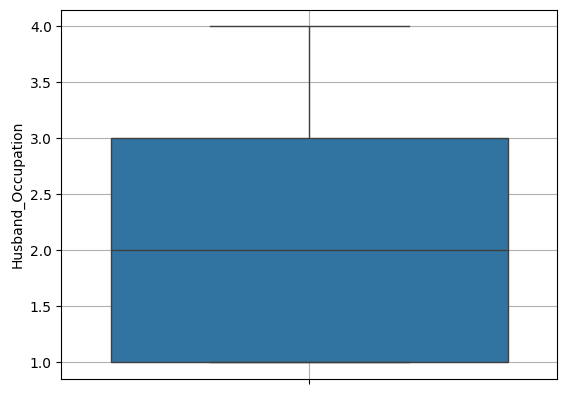

In [10]:
#Checking the spread of the data using boxplot for the continuous variables
cols = ['Wife_age',	'No_of_children_born','Husband_Occupation']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();

In [11]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
    

In [12]:
lr,ur=remove_outlier(data['No_of_children_born'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data['No_of_children_born']=np.where(data['No_of_childr
en_born']>ur,ur,data['No_of_children_born'])
data['No_of_children_born']=np.where(data['No_of_children_born']<lr,lr,data['No_of_children_born'])

Lower Range : nan 
Upper Range : nan


In [19]:
numerical_data = data[["Wife_age", "No_of_children_born"]]
correlation_matrix = numerical_data.corr()
print(correlation_matrix)


                     Wife_age  No_of_children_born
Wife_age              1.00000              0.53952
No_of_children_born   0.53952              1.00000


In [24]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [25]:
data.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_excel('Contraceptive_method_dataset.xlsx')

# Define columns to impute
columns_to_impute = ['Wife_age', 'No_of_children_born']

# Create a SimpleImputer with the strategy set to 'median'
imputer = SimpleImputer(strategy='median')

# Impute missing values with the median
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Check the data with missing values imputed
print(data.head())


   Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed       

In [27]:
data.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [36]:
data.rename(columns={'Wife_ education': 'Wife_education'}, inplace=True)
data.rename(columns={'Media_exposure ': 'Media_exposure'}, inplace=True)



In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_education             1473 non-null   int64  
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int64  
 5   Wife_Working               1473 non-null   int64  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 115.2+ KB


In [38]:
print(data.columns)


Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = ['Wife_education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Standard_of_living_index', 'Media_exposure','Contraceptive_method_used']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into training and testing sets (70:30)
X = data.drop('Contraceptive_method_used', axis=1)
y = data['Contraceptive_method_used']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have your data encoded and split for modeling.


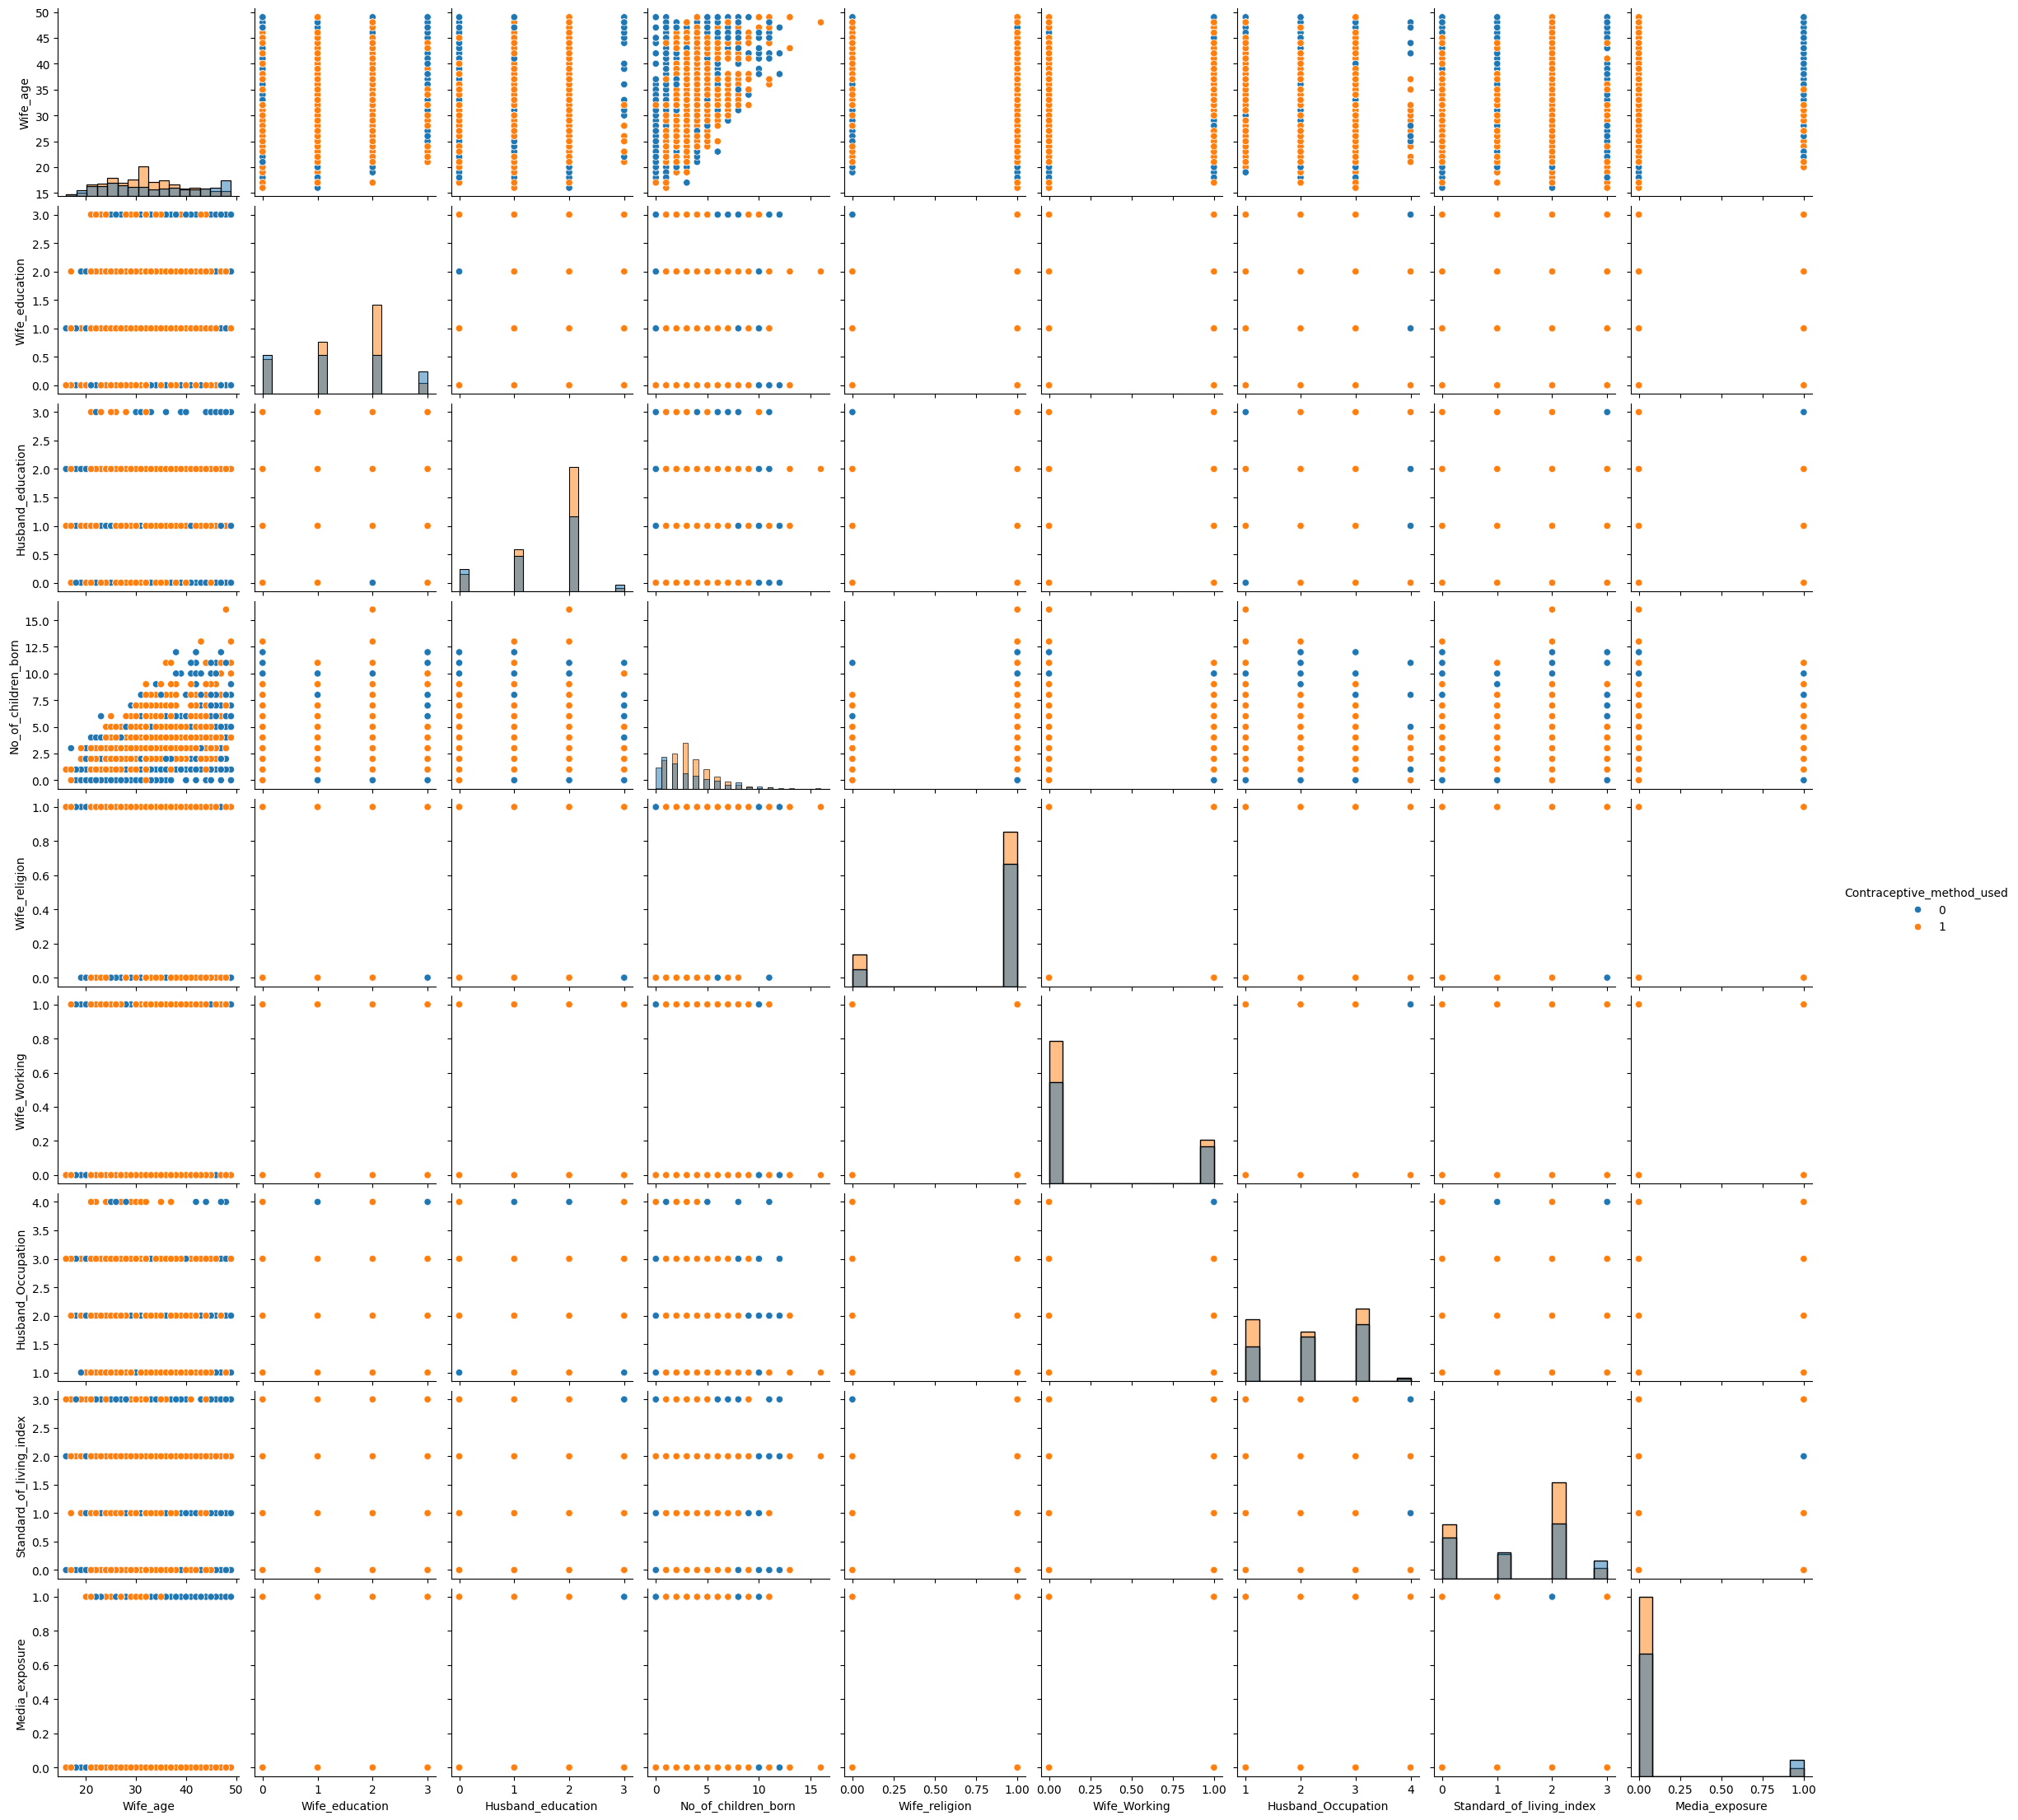

In [66]:
# Pairplot using sns
sns.pairplot(data ,diag_kind='hist' ,hue='Contraceptive_method_used');

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [55]:
# Define and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# Define and train the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [57]:
# Define and train the CART model
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [62]:
from sklearn.metrics import precision_score, recall_score

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
    auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    print(f"Performance Metrics for {dataset_name} dataset:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_name}')
    plt.legend(loc='lower right')
    plt.show()


Performance Metrics for Logistic Regression (Training) dataset:
Accuracy: 0.65
Confusion Matrix:
[[175 260]
 [101 495]]
Precision: 0.66
Recall: 0.83


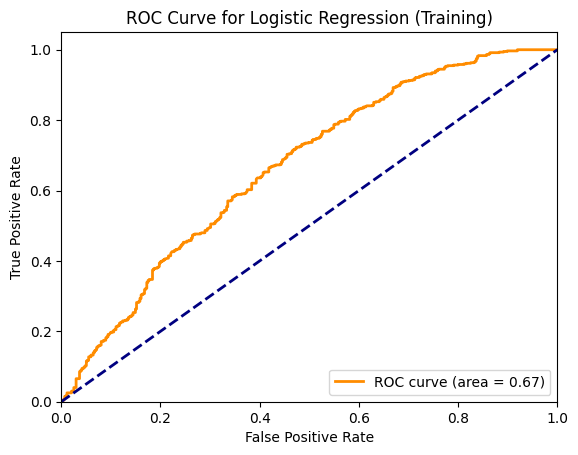

Performance Metrics for Logistic Regression (Testing) dataset:
Accuracy: 0.67
Confusion Matrix:
[[ 82 112]
 [ 34 214]]
Precision: 0.66
Recall: 0.86


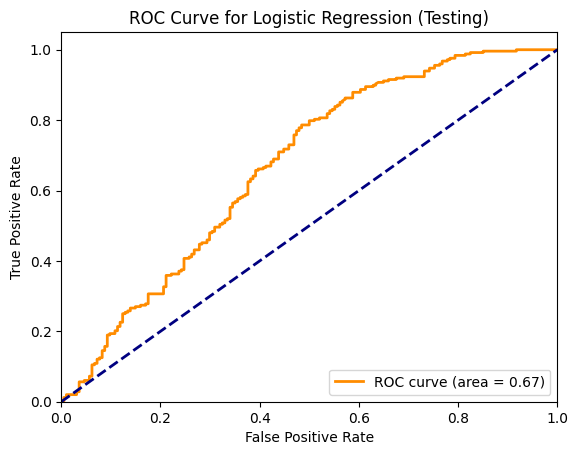

In [63]:
# Evaluate Logistic Regression model
evaluate_model(logistic_model, X_train, y_train, 'Logistic Regression (Training)')
evaluate_model(logistic_model, X_test, y_test, 'Logistic Regression (Testing)')


Performance Metrics for LDA (Training) dataset:
Accuracy: 0.65
Confusion Matrix:
[[175 260]
 [ 98 498]]
Precision: 0.66
Recall: 0.84


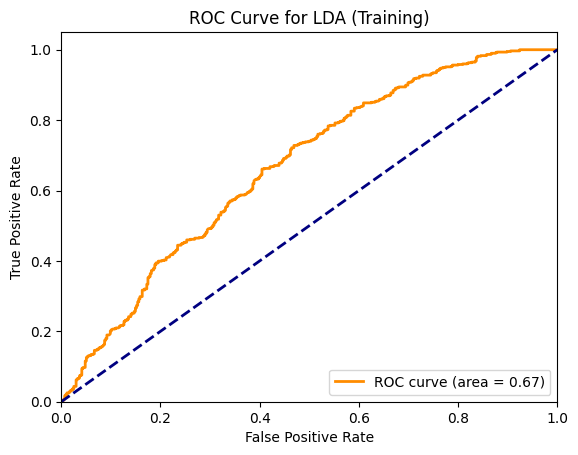

Performance Metrics for LDA (Testing) dataset:
Accuracy: 0.67
Confusion Matrix:
[[ 79 115]
 [ 32 216]]
Precision: 0.65
Recall: 0.87


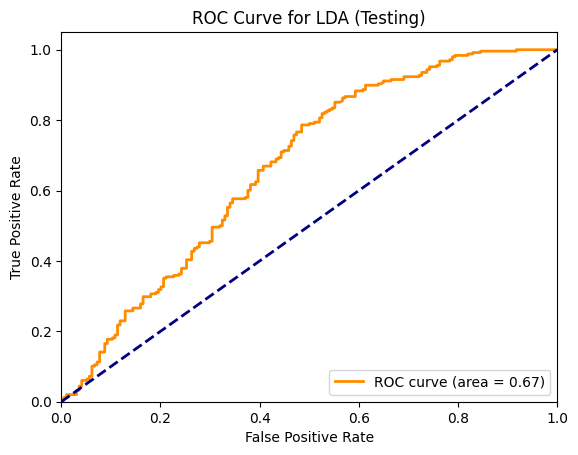

In [64]:
# Evaluate LDA model
evaluate_model(lda_model, X_train, y_train, 'LDA (Training)')
evaluate_model(lda_model, X_test, y_test, 'LDA (Testing)')

Performance Metrics for CART (Training) dataset:
Accuracy: 0.98
Confusion Matrix:
[[429   6]
 [ 15 581]]
Precision: 0.99
Recall: 0.97


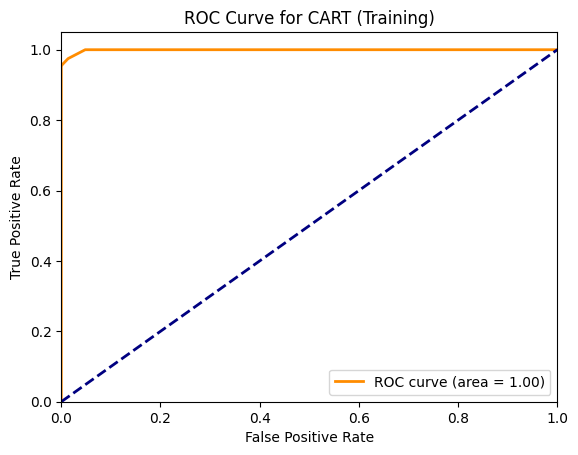

Performance Metrics for CART (Testing) dataset:
Accuracy: 0.66
Confusion Matrix:
[[129  65]
 [ 86 162]]
Precision: 0.71
Recall: 0.65


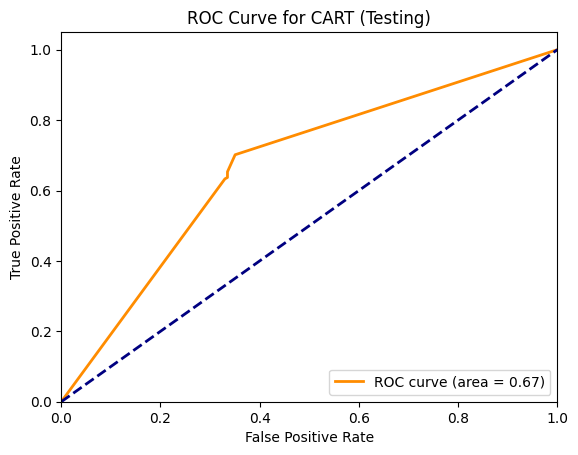

In [65]:
# Evaluate CART model
evaluate_model(cart_model, X_train, y_train, 'CART (Training)')
evaluate_model(cart_model, X_test, y_test, 'CART (Testing)')